In [2]:
# 缺失值处理

from io import StringIO

import pandas as pd
from sklearn.preprocessing import Imputer

csv_data = """A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
0.0,11.0,12.0,"""

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [3]:
df.isnull().sum()  # 统计每列缺失值的个数

A    0
B    0
C    1
D    1
dtype: int64

In [4]:
df.values   # 查看numpy数组

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,  nan,   8.],
       [  0.,  11.,  12.,  nan]])

In [7]:
# 以均值插补填充缺失值
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)  # 使用每列的均值替换缺失值
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

# 在Imputer的strategy参数中，还可以取median或most_frequent, 
# most_frequent代表对应行或者列出现次数最多的值来替换缺失值

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [  0. ,  11. ,  12. ,   6. ]])

##### 理解sklearn中预估器的API

* Imputer属于sklearn中的转换器，主要用于数据转换；常用方法是fit和transform，fit用于对数据集中的参数进行识别并构建相应的数据补齐模型，而transform则使用刚构建的数据补全模型对数据集中相应的参数的缺失值进行补齐；

  * fit
  * transform
  * predict
  
##### 处理类别数据

类别分为标称特征和有序特征；

In [8]:
# 处理类别数据
df2 = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']
])

df2.columns = ['color', 'size', 'price', 'classlabel']
df2

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [9]:
# 有序特征映射
size_mapping = {
    'XL': 3,
    'L': 2,
    'M': 1
}
df2['size'] = df2['size'].map(size_mapping)
df2

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [10]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df2['size'].map(inv_size_mapping)   #  编码反转

0     M
1     L
2    XL
Name: size, dtype: object

In [12]:
# 类标的编码
import numpy as np
class_mapping = {label: idx for idx, label in enumerate(np.unique(df2['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [13]:
df2['classlabel'] = df2['classlabel'].map(class_mapping)
df2

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [18]:
# 使用LabelEncoder可以更方便的完成类标的编码工作
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df2['color'].values)
df2['color'] = class_le.fit_transform(df2['color'].values)
y

array([1, 2, 0])

In [19]:
class_le.inverse_transform(y)   # 还原为原始的字符串

array(['green', 'red', 'blue'], dtype=object)

In [21]:
# 使用LabelEncoder可以将类标特征转成整数编码，但是对于无序特征来讲，还是不可以直接扔给模型使用，
# 因为这样会大大降低模型的效果，无法反映真实的世界；这里用的技术是 独热编码（one-hot encoding）
# 原理是：创建 一个 新的 虚拟 特征（ dummy feature）， 虚拟 特征 的 每一 列 各代 表 标称 数据 的 一个 值。
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])  # OneHotEncoder 还有很多其他参数，可以参考sklearn的参数查看
ohe.fit_transform(df2).toarray()

array([[  0. ,   1. ,   0. ,   1. ,  10.1,   0. ],
       [  0. ,   0. ,   1. ,   2. ,  13.5,   1. ],
       [  1. ,   0. ,   0. ,   3. ,  15.3,   0. ]])

In [46]:
# 对于独立热编码。还有另外的一种方式，是使用pandas中的get_dummies方法
df2['color'] = df2['color'].astype('object')
pd.get_dummies(df2[['color']])

,color_0,color_1,color_2
0,0,1,0
1,0,0,1
2,1,0,0


In [42]:
df2.dtypes

color          object
size            int64
price         float64
classlabel      int64
dtype: object

In [48]:
# 将数据集分为测试集和训练集
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = [
    'Class label', 'Alcohol', 'Malic acid', 'Ash', 
    'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
    'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
    'Hue', 'OD280/OD315 of diluted wines', 'Proline'
]
print(np.unique(df_wine['Class label']))
df_wine.head()

[1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [55]:
# 划分train and test
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [56]:
X_train

array([[  1.37100000e+01,   1.86000000e+00,   2.36000000e+00, ...,
          1.11000000e+00,   4.00000000e+00,   1.03500000e+03],
       [  1.22200000e+01,   1.29000000e+00,   1.94000000e+00, ...,
          8.60000000e-01,   3.02000000e+00,   3.12000000e+02],
       [  1.32700000e+01,   4.28000000e+00,   2.26000000e+00, ...,
          5.90000000e-01,   1.56000000e+00,   8.35000000e+02],
       ..., 
       [  1.24200000e+01,   1.61000000e+00,   2.19000000e+00, ...,
          1.06000000e+00,   2.96000000e+00,   3.45000000e+02],
       [  1.39000000e+01,   1.68000000e+00,   2.12000000e+00, ...,
          9.10000000e-01,   3.33000000e+00,   9.85000000e+02],
       [  1.41600000e+01,   2.51000000e+00,   2.48000000e+00, ...,
          6.20000000e-01,   1.71000000e+00,   6.60000000e+02]])

In [57]:
# 特征缩放，决策 树 和 随机 森林 是 机器 学习 算法 中 为数不多 的 不需要 进行 特征 缩放 的 算法。 
# 然而， 对 大多数 机器 学习 和 优化 算法 而言， 将 特征 的 值 缩放 到 相同 的 区间 可以 使其 性能 更佳
# 特征缩放的方法有：标准化和归一化

# 归一化指将特征的值缩放到区间[0,1], 是最小-最大缩放的一个特例，我们可以简单的使用以下方式做缩放：
# x = (x_i - x_min) / (x_max - x_min)
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)
X_train_norm


array([[ 0.72043011,  0.20378151,  0.53763441, ...,  0.48717949,
         1.        ,  0.5854251 ],
       [ 0.31989247,  0.08403361,  0.31182796, ...,  0.27350427,
         0.64102564,  0.        ],
       [ 0.60215054,  0.71218487,  0.48387097, ...,  0.04273504,
         0.10622711,  0.42348178],
       ..., 
       [ 0.37365591,  0.1512605 ,  0.44623656, ...,  0.44444444,
         0.61904762,  0.02672065],
       [ 0.77150538,  0.16596639,  0.40860215, ...,  0.31623932,
         0.75457875,  0.54493927],
       [ 0.84139785,  0.34033613,  0.60215054, ...,  0.06837607,
         0.16117216,  0.28178138]])

In [58]:
# 另外一种标准化的方法更加实用
# 将每个特征的值分布都符合正态分布，方差1，均值0，优点是保持了异常值所蕴含的所有信息，并且算法受到的影响最小
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)
X_train_std

array([[ 0.91083058, -0.46259897, -0.01142613, ...,  0.65706596,
         1.94354495,  0.93700997],
       [-0.95609928, -0.96608672, -1.53725357, ..., -0.40859506,
         0.58118003, -1.41336684],
       [ 0.35952243,  1.67501572, -0.37471838, ..., -1.55950896,
        -1.44846566,  0.28683658],
       ..., 
       [-0.70550467, -0.68342693, -0.62902295, ...,  0.44393375,
         0.49776993, -1.30608823],
       [ 1.14889546, -0.6215951 , -0.88332752, ..., -0.19546286,
         1.0121322 ,  0.77446662],
       [ 1.47466845,  0.11155374,  0.42452457, ..., -1.43162964,
        -1.23994042, -0.28206514]])

* 如果 一个 模型 在 训练 数据 集上 的 表现 比 在 测试 数据 集上 好 很多， 这 意味着 模型 过 拟 合（ overfitting） 于 训练 数据。 过 拟 合 是指 模型 参数 对于 训练 数据 集 的 特定 观测 值 拟 合 得 非常 接近， 但 训练 数据 集 的 分布 与 真实 数据 并不 一致—— 我们 称之为 模型 具有 较高 的 方差。 产生 过 拟 合 的 原因 是 建立 在给 定 训练 数据 集上 的 模型 过于 复杂， 而 常用 的 降低 泛 化 误差 的 方案 有： 
  * 1） 收集 更多 的 训练 数据 
  * 2） 通过 正 则 化 引入 罚 项 
  * 3） 选择 一个 参数 相对 较少 的 简单 模型 
  * 4） 降低 数据 的 维 度

* 使用L1正则化满足数据稀疏化



In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print('Training accuracy: ', lr.score(X_train_std, y_train))

Training accuracy:  0.983870967742


In [61]:
print('Test accuracy: ', lr.score(X_test_std, y_test))

Test accuracy:  0.981481481481


In [63]:
lr.intercept_

array([-0.38380641, -0.15815217, -0.70045803])

In [64]:
lr.coef_

array([[ 0.28018849,  0.        ,  0.        , -0.02794571,  0.        ,
         0.        ,  0.71007751,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23625242],
       [-0.64378949, -0.06895096, -0.05715682,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92722368,
         0.05981473,  0.        , -0.3709574 ],
       [ 0.        ,  0.06153566,  0.        ,  0.        ,  0.        ,
         0.        , -0.63567939,  0.        ,  0.        ,  0.49786512,
        -0.35825678, -0.5717022 ,  0.        ]])

In [67]:
# 随机森林判断特征重要性
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=10000, random_state=42, n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (i + 1, 30, feat_labels[i], importances[indices[i]]))

 1) Alcohol                        0.181851
 2) Malic acid                     0.155809
 3) Ash                            0.147718
 4) Alcalinity of ash              0.134738
 5) Magnesium                      0.108092
 6) Total phenols                  0.079281
 7) Flavanoids                     0.061006
 8) Nonflavanoid phenols           0.032550
 9) Proanthocyanins                0.024319
10) Color intensity                0.022923
11) Hue                            0.022913
12) OD280/OD315 of diluted wines   0.015034
13) Proline                        0.013767


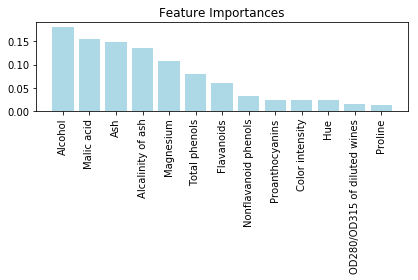

In [69]:
import matplotlib.pyplot as plt

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [72]:
X_selected = forest.transform(X_train, threshold=0.14)
X_selected.shape

/Users/shniu/Anaconda/anaconda/envs/ai/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


(124, 3)